## Local Outlier Factor on a synthetic dataset

### First we import all the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings("ignore")

In [5]:
import seaborn as sns
sns.set()

In [2]:
X = np.load('clusterable_data.npy')

### We need to unzip these X's and Y's to pass it to the scatter plot

In [3]:
a=tuple(zip(*X))

## Let's see how this data looks like

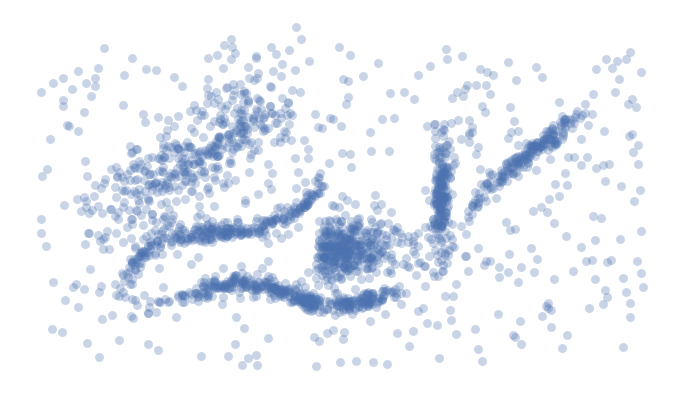

In [6]:
plt.figure(figsize=(12,7))
plt.scatter(a[0], a[1], c='b', alpha= 0.30, s=80, linewidths=0)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
frame.axis("off");

### Now below we call the LOF method from sklearn. Here the contamination part is where it assigns those many points as outliers and that too it does as per the score it assigns using LOF algorithm.

### For our use, we just are going to use the score and show a circle around every point to show how each point faired as per the score.¶

### POINT TO NOTE- Here the n_neighbors value is subjective and as from the documentation itself, finding the most efficient value depends on type of data

In [9]:
# fit the model for outlier detection (default)
neighbours=10
clf = LocalOutlierFactor(n_neighbors=neighbours, contamination=0.1)

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).

y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

### Now let's plot these values and a circle around these values as per their LOF score

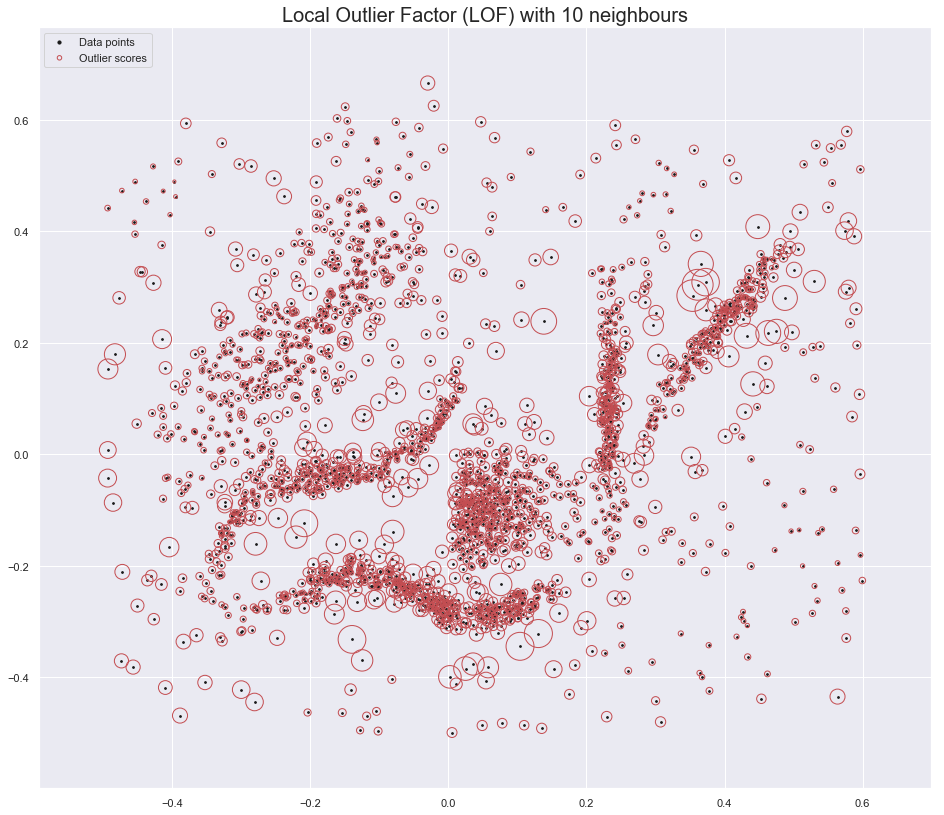

In [10]:
plt.figure(figsize=(16,14))

plt.title(f"Local Outlier Factor (LOF) with {neighbours} neighbours",fontsize=20)
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim(min(a[0])-0.1,max(a[0])+0.1)
plt.ylim(min(a[1])-0.1,max(a[1])+0.1)
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

### We clearly see the big issue here with LOF, if number of neighbours given are taken 10, it's assigning clear outliers too very low LOF value. Well so let's try some other assignments

### Below I'll just show the graphs, the code remains same, so just changing values above gives desired output

### With neighbours taken as equal to 50, we see, the results are bit better, but clearly values at the right bottom and left upper side are still getting low score

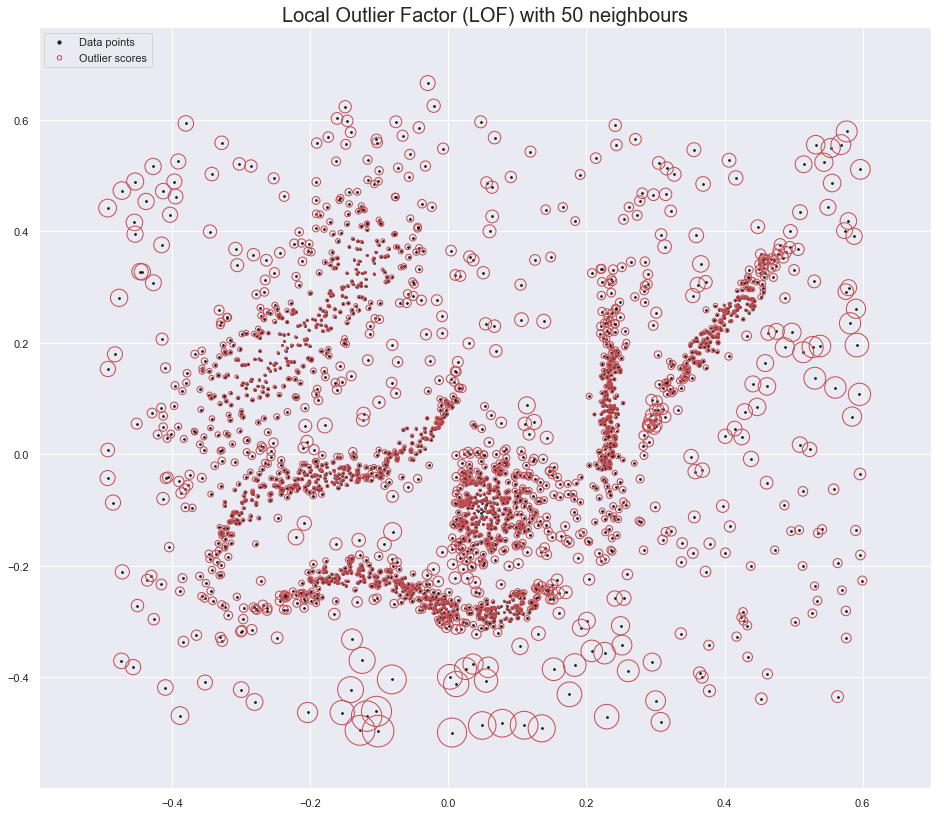

### Now with n=100, we are getting somewhere

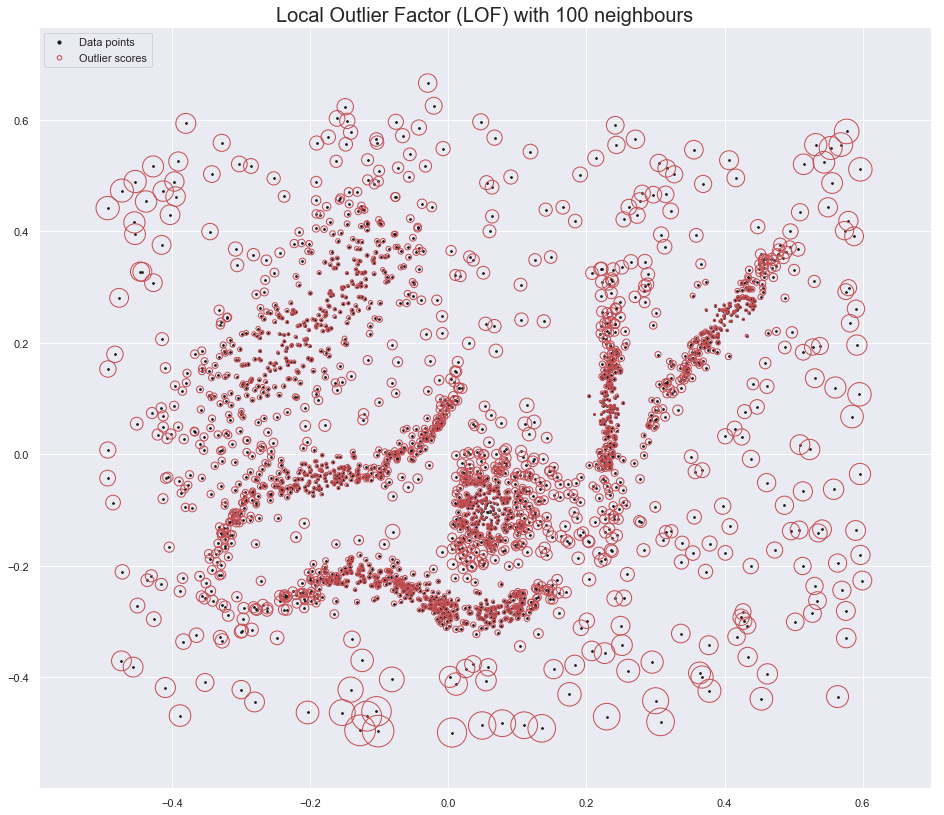

### So we see that taking 100 neighbours has done the work very efficiently

### Another approach suggested on the original paper is to plot the max and min value of the scores of each MinPts we take and wherever the curve starts to stabalize over the difference between the two value, use that

### So let's try to make that curve first

In [15]:
maxs={}
mins={}
for i in range(1,201):
    clf = LocalOutlierFactor(n_neighbors=i)
    y_pred = clf.fit_predict(X)
    X_scores = clf.negative_outlier_factor_
    
    m=-(X_scores*100)
    maxs[i]=max(m)
    mins[i]=min(m)

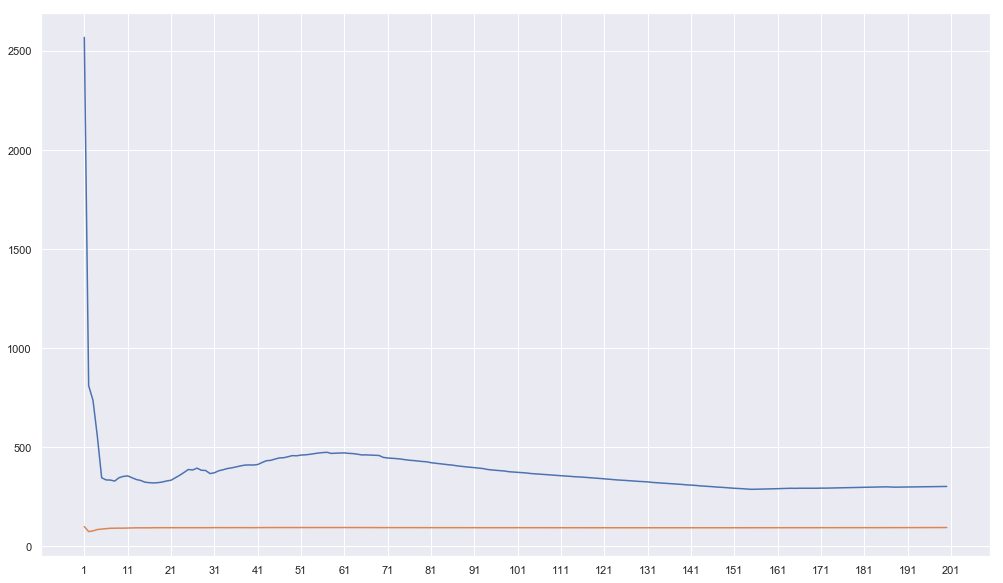

In [16]:
plt.figure(figsize=(17,10))
plt.plot(maxs.keys(), maxs.values())
plt.plot(mins.keys(), mins.values())
plt.xticks(np.arange(1, 202, step=10))
plt.show()

### So around 155 is stabalize, so let's plot the results for this

### And the output is:

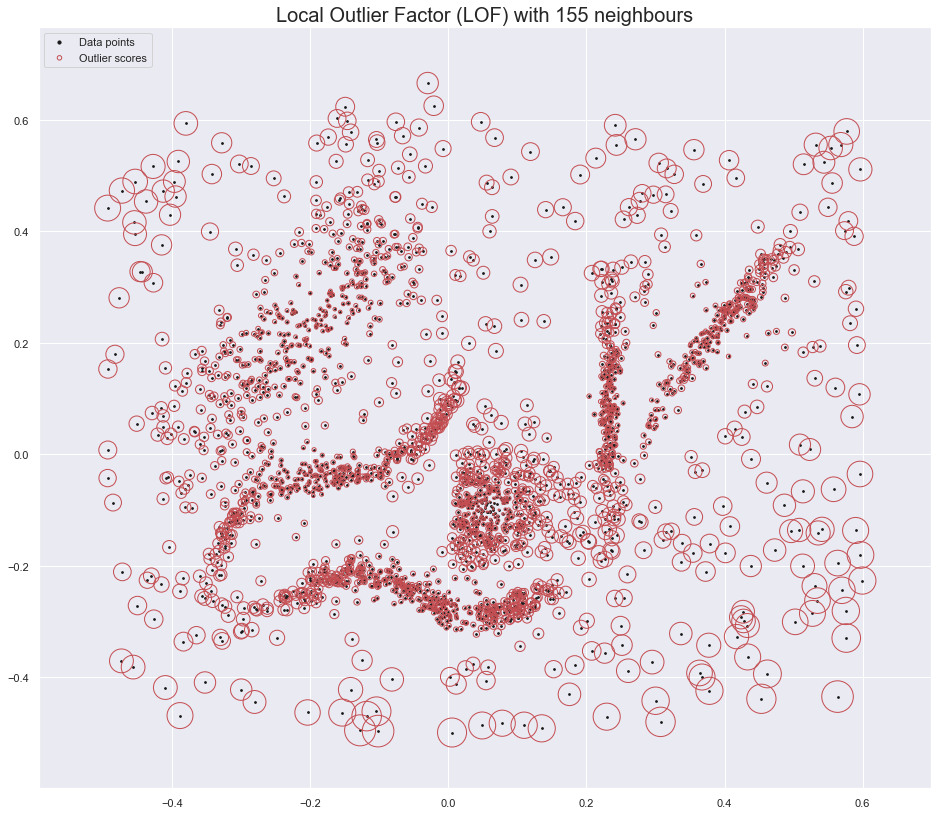

### The results aren't much different than with n=100, but this one does makes a better outlook of outlier types of data as with higher red radius around them.

### So that's it about LOF